<a href="https://colab.research.google.com/github/muhammadwachid/StudyLog/blob/main/SVI/classification/2_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Train Test Split

In [ ]:
admission = pd.read_csv('admission.csv')

In [ ]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Instruksi:

ttest_ind:
buat kolom baru 'admit' pada dataset admission, di mana apabila chance of admit > 0.7 = 1, else 0

lakukan ttest ind:
h0: mean toefl score mahasiswa yang diterima = mean toefl score mahasiswa yang tidak diterima
h1:mean toefl score mahasiswa yang diterima ≠ mean toefl score mahasiswa yang tidak diterima


anova_oneway:

filter dataset covid untuk include tanggal 2020-07-27.

lakukan anova:
h0: mean kasus aktif semua region sama
h1: terdapat setidaknya 2 region dengan mean kasus aktif yang berbeda

In [ ]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
for x in np.arange(0,len(admission)):
    if admission.loc[x, 'Chance of Admit '] > 0.7:
        admission.loc[x, 'admit'] = 1
    else:
        admission.loc[x, 'admit'] = 0

In [ ]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1.0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [ ]:
admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'admit'],
      dtype='object')

In [ ]:
admission2 = admission.drop(['Serial No.', 'Chance of Admit '], axis=1)

In [ ]:
admission2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [ ]:
X = admission2.drop(['admit'], axis=1)
y = admission2['admit']

In [ ]:
X.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify = y)

In [ ]:
X_train.shape

(400, 7)

In [ ]:
X_test.shape

(100, 7)

In [ ]:
y_train.shape

(400,)

In [ ]:
y_test.shape

(100,)

Gunakan data set churn. Dengan menggunakan kolom 'attrition_flag' sebagai fitur target. lakukan train test split dengan test_size, dan samakan rasio 1 dan 0 fitur target pada train set dan test set.

Lakukan imputation pada Xtrain. Pakai metode .fit() dan .transform().

Untuk kolom kategorikal apabila menggunakan label encoder kembalikan lagi ke kategori awal pada X_train2.

Hasil imputation jadikan = X_train2

In [ ]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
230,313,104,3,4.0,4.5,8.65,0
18,318,110,3,4.0,3.0,8.80,0
260,327,108,5,5.0,3.5,9.13,1
203,334,120,5,4.0,5.0,9.87,1
359,321,107,2,2.0,1.5,8.44,0


In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(titanic['Embarked'])

LabelEncoder()

In [ ]:
a = pd.DataFrame(le.transform(titanic['Embarked']))

In [ ]:
titanic['Embarked_enc'] = a

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
titanic['Embarked_reversed'] = le.inverse_transform(a)

/Users/pandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_enc,Embarked_reversed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,S


# Scaling

In [ ]:
churn_imputed = pd.read_csv('churn_imputed.csv')

In [ ]:
churn_imputed.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,36.0,0.0,24.0,4.0,3.0,2.0,2570.0,2230.0,340.0,0.686,1755.0,42.0,0.448,0.868,F,Graduate,Married,Less than $40K,Blue
1,44.0,3.0,36.0,5.0,2.0,3.0,25276.0,0.0,25276.0,0.849,2282.0,38.0,0.583,0.000,M,High School,Single,$60K - $80K,Silver
2,46.0,2.0,30.0,6.0,3.0,1.0,11670.0,915.0,10755.0,0.892,4277.0,89.0,0.854,0.078,M,High School,Married,$80K - $120K,Blue
3,36.0,2.0,24.0,3.0,1.0,3.0,3124.0,1593.0,1531.0,0.869,1652.0,41.0,0.367,0.510,F,Graduate,Married,Less than $40K,Blue
4,50.0,1.0,40.0,4.0,2.0,3.0,34516.0,1185.0,33331.0,0.725,3874.0,72.0,0.714,0.034,M,Graduate,Single,$120K +,Blue


In [ ]:
churn_num = churn_imputed.select_dtypes(include = 'number')

In [ ]:
churn_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,36.0,0.0,24.0,4.0,3.0,2.0,2570.0,2230.0,340.0,0.686,1755.0,42.0,0.448,0.868
1,44.0,3.0,36.0,5.0,2.0,3.0,25276.0,0.0,25276.0,0.849,2282.0,38.0,0.583,0.000
2,46.0,2.0,30.0,6.0,3.0,1.0,11670.0,915.0,10755.0,0.892,4277.0,89.0,0.854,0.078
3,36.0,2.0,24.0,3.0,1.0,3.0,3124.0,1593.0,1531.0,0.869,1652.0,41.0,0.367,0.510
4,50.0,1.0,40.0,4.0,2.0,3.0,34516.0,1185.0,33331.0,0.725,3874.0,72.0,0.714,0.034


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sscaler = StandardScaler()

In [ ]:
sscaler.fit(churn_num)

StandardScaler()

In [ ]:
churn_num_scaled = sscaler.transform(churn_num)

In [ ]:
churn_num_scaled = pd.DataFrame(churn_num_scaled)

In [ ]:
churn_num_scaled.columns = churn_num.columns

In [ ]:
churn_num_scaled.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-1.301232,-1.809900,-1.513205,0.122196,0.646495,-0.411236,-0.665434,1.303942,-0.783057,-0.335597,-0.775093,-0.961644,-1.093573,2.148867
1,-0.299340,0.501503,-0.000700,0.765411,-0.342413,0.489635,1.848571,-1.433246,1.977862,0.407489,-0.619960,-1.131083,-0.537244,-1.000072
2,-0.048867,-0.268965,-0.756952,1.408625,0.646495,-1.312106,0.342117,-0.310139,0.370094,0.603518,-0.032694,1.029259,0.579534,-0.717103
3,-1.301232,-0.268965,-1.513205,-0.521019,-1.331320,0.489635,-0.604095,0.522064,-0.651190,0.498665,-0.805413,-1.004004,-1.427370,0.850111
4,0.452079,-1.039432,0.503468,0.122196,-0.342413,0.489635,2.871622,0.021269,2.869713,-0.157803,-0.151325,0.309145,0.002601,-0.876727


In [ ]:
churn_num.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000
mean,46.390199,2.349093,36.005555,3.810023,2.346254,2.456487,8580.069991,1167.672139,7412.397852,0.759615,4388.065054,64.701889,0.713369,0.275668
std,7.985385,1.297993,7.934351,1.554787,1.011280,1.110106,9032.362733,814.755132,9032.331209,0.219369,3397.305917,23.608831,0.242677,0.275665
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000,0.000000,530.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2562.000000,411.000000,1329.000000,0.630000,2139.000000,45.000000,0.581000,0.025000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4532.000000,1289.000000,3454.000000,0.735000,3894.000000,67.000000,0.702000,0.177000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10973.000000,1786.000000,9750.000000,0.859000,4741.000000,81.000000,0.818000,0.504000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17995.000000,139.000000,3.714000,0.995000


In [ ]:
churn_num_scaled.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03,8.101000e+03
mean,-5.889486e-16,-2.942139e-16,7.120722e-16,1.782442e-16,8.528475e-17,4.090872e-16,9.067073e-17,2.434240e-16,-4.005903e-17,-3.988772e-17,2.623820e-17,-1.178610e-16,-3.591462e-16,-5.237961e-17
std,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,-2.553597e+00,-1.809900e+00,-2.899667e+00,-1.807449e+00,-2.320227e+00,-2.212977e+00,-7.907356e-01,-1.433246e+00,-8.195951e-01,-3.462938e+00,-1.135695e+00,-2.317153e+00,-2.939759e+00,-1.000072e+00
25%,-6.750497e-01,-1.039432e+00,-5.048683e-01,-5.210191e-01,-3.424127e-01,-4.112356e-01,-6.663197e-01,-9.287684e-01,-6.735552e-01,-5.908898e-01,-6.620552e-01,-8.345650e-01,-5.454858e-01,-9.093771e-01
50%,-4.886713e-02,-2.689647e-01,-7.001471e-04,1.221957e-01,-3.424127e-01,-4.112356e-01,-4.482016e-01,1.489225e-01,-4.382747e-01,-1.122150e-01,-1.454375e-01,9.734718e-02,-4.685047e-02,-3.579499e-01
75%,7.025519e-01,5.015031e-01,5.034680e-01,7.654105e-01,6.464947e-01,4.896351e-01,2.649448e-01,7.589594e-01,2.588198e-01,4.530771e-01,1.038931e-01,6.903822e-01,4.311801e-01,8.283440e-01
max,3.332519e+00,2.042438e+00,2.520141e+00,1.408625e+00,3.613217e+00,3.192247e+00,2.871622e+00,1.656217e+00,3.000917e+00,1.202333e+01,4.005461e+00,3.147242e+00,1.236546e+01,2.609599e+00


subset X_train (post-imputation) hanya include number. lakukan standardscaling. buktikan standardscaling berhasil dengan fungsi .describe()

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer_knn = KNNImputer(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [ ]:
X_train.shape

(712, 7)

In [ ]:
y_train.shape

(712,)

In [ ]:
X_train_obj = X_train.select_dtypes('object').fillna('delete')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
import numpy as np

In [ ]:
oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)

In [ ]:
oe.fit(X_train_obj)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [ ]:
oe.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', 'delete'], dtype=object)]

In [ ]:
for x,y in enumerate(oe.categories_[1]):
    if y == 'delete':
        print(x)

3


In [ ]:
X_train_obj_enc = pd.DataFrame(oe.transform(X_train_obj))

In [ ]:
X_train_obj_enc.columns = X_train_obj.columns

In [ ]:
X_train_num = X_train.select_dtypes('number').reset_index(drop=True)

In [ ]:
X_train_enc = pd.concat([X_train_num,X_train_obj_enc], axis=1)

In [ ]:
X_train_enc['Embarked'] = X_train_enc['Embarked'].replace(3, np.nan)

In [ ]:
imputer_knn.fit(X_train_enc)

KNNImputer(n_neighbors=3)

In [ ]:
X_train_enc_imputed = pd.DataFrame(imputer_knn.transform(X_train_enc))

In [ ]:
X_train_enc_imputed.columns = X_train_enc.columns

In [ ]:
X_train_obj_inv = pd.DataFrame(oe.inverse_transform(X_train_enc_imputed[X_train_obj.columns]))

In [ ]:
X_train_obj_inv.columns = X_train_obj.columns

In [ ]:
X_train_imputed = X_train_enc_imputed.copy()

In [ ]:
X_train_imputed[X_train_obj.columns] = X_train_obj_inv.values

In [ ]:
X_train_imputed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1.0,33.0,0.0,0.0,86.500,female,S
1,1.0,37.0,1.0,0.0,53.100,male,S
2,2.0,24.0,2.0,3.0,18.750,female,S
3,3.0,31.0,0.0,0.0,7.775,male,S
4,3.0,43.5,0.0,0.0,7.750,male,Q


In [ ]:
X_train_imputed.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Embarked    0
dtype: int64

## Standard Scaler

In [ ]:
X_train_imp_num = X_train_imputed.select_dtypes('number')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sscaler = StandardScaler()

In [ ]:
sscaler.fit(X_train_imp_num)

StandardScaler()

In [ ]:
X_train_imp_num_scaled = pd.DataFrame(sscaler.transform(X_train_imp_num))

In [ ]:
X_train_imp_num_scaled.columns = X_train_imp_num.columns

In [ ]:
X_train_imp_num_scaled.head()

,Pclass,Age,SibSp,Parch,Fare
0,-1.623363,0.217373,-0.470696,-0.469130,1.096384
1,-1.623363,0.514092,0.406622,-0.469130,0.422763
2,-0.413065,-0.450244,1.283941,3.059256,-0.270018
3,0.797233,0.069014,-0.470696,-0.469130,-0.491365
4,0.797233,0.996260,-0.470696,-0.469130,-0.491869


In [ ]:
X_train_imp_num_scaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,-1.094630e-16,-4.077575e-16,1.429880e-16,-1.124257e-16,-9.831399e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-1.623363e+00,-2.199402e+00,-4.706961e-01,-4.691300e-01,-6.481734e-01
25%,-4.130652e-01,-5.986039e-01,-4.706961e-01,-4.691300e-01,-4.889286e-01
50%,7.972329e-01,-7.934590e-02,-4.706961e-01,-4.691300e-01,-3.693468e-01
75%,7.972329e-01,6.346338e-01,4.066223e-01,-4.691300e-01,-2.295640e-02
max,7.972329e-01,3.258741e+00,6.547851e+00,6.587642e+00,9.684630e+00


## Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler()

In [ ]:
mmscaler.fit(X_train_imp_num)

MinMaxScaler()

In [ ]:
X_train_imp_num_mmscaled = pd.DataFrame(mmscaler.transform(X_train_imp_num))

In [ ]:
X_train_imp_num_mmscaled.columns = X_train_imp_num.columns

In [ ]:
X_train_imp_num_mmscaled.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.442783,0.000,0.0,0.168837
1,0.0,0.497146,0.125,0.0,0.103644
2,0.5,0.320468,0.250,0.5,0.036598
3,1.0,0.415602,0.000,0.0,0.015176
4,1.0,0.585485,0.000,0.0,0.015127


In [ ]:
X_train_imp_num_mmscaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.670646,0.402958,0.067065,0.066479,0.062730
std,0.413412,0.183341,0.142580,0.141807,0.096847
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.293286,0.000000,0.000000,0.015412
50%,1.000000,0.388421,0.000000,0.000000,0.026985
75%,1.000000,0.519231,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Age', ylabel='Count'>

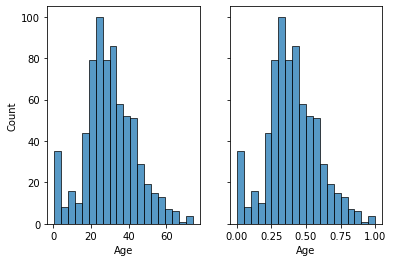

In [ ]:
fig, axs = plt.subplots(1,2, sharey=True)
sns.histplot(X_train_imp_num['Age'], ax = axs[0])
sns.histplot(X_train_imp_num_mmscaled['Age'], ax = axs[1])

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
mascaler = MaxAbsScaler()

In [ ]:
mascaler.fit(X_train_imp_num)

MaxAbsScaler()

In [ ]:
X_train_imp_num_mascaled = pd.DataFrame(mascaler.transform(X_train_imp_num))

In [ ]:
X_train_imp_num_mascaled.columns = X_train_imp_num.columns

In [ ]:
X_train_imp_num_mascaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.780431,0.406347,0.067065,0.066479,0.062730
std,0.275608,0.182301,0.142580,0.141807,0.096847
min,0.333333,0.005676,0.000000,0.000000,0.000000
25%,0.666667,0.297297,0.000000,0.000000,0.015412
50%,1.000000,0.391892,0.000000,0.000000,0.026985
75%,1.000000,0.521959,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

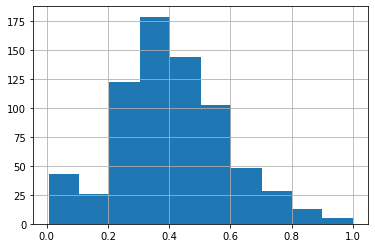

In [ ]:
X_train_imp_num_mascaled['Age'].hist()

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rscaler = RobustScaler()

In [ ]:
rscaler.fit(X_train_imp_num)

RobustScaler()

In [ ]:
X_train_imp_num_rscaled = pd.DataFrame(rscaler.transform(X_train_imp_num))

In [ ]:
X_train_imp_num_rscaled.columns = X_train_imp_num.columns

In [ ]:
X_train_imp_num_rscaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,7.120000e+02
mean,-0.658708,0.064340,0.536517,0.398876,7.926369e-01
std,0.826824,0.811444,1.140638,0.850845,2.147559e+00
min,-2.000000,-1.719098,0.000000,0.000000,-5.983761e-01
25%,-1.000000,-0.421053,0.000000,0.000000,-2.566287e-01
50%,0.000000,0.000000,0.000000,0.000000,3.838076e-17
75%,0.000000,0.578947,1.000000,0.000000,7.433713e-01
max,0.000000,2.706767,8.000000,6.000000,2.157635e+01


# One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
X_train_imp_obj = X_train_imputed.select_dtypes('object')

In [ ]:
ohe.fit(X_train_imp_obj)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
X_train_imp_obj_ohe = pd.DataFrame(ohe.transform(X_train_imp_obj).toarray())

In [ ]:
X_train_imp_obj_ohe.columns = ohe.get_feature_names(X_train_imp_obj.columns)

/Users/pandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_imp_obj_ohe.tail()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
707,0.0,1.0,0.0,0.0,1.0
708,0.0,1.0,1.0,0.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,0.0,1.0,0.0,0.0,1.0
711,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_train_imp_num_rscaled.tail()

,Pclass,Age,SibSp,Parch,Fare
707,-1.0,-1.694436,0.0,2.0,0.656807
708,0.0,-0.421053,0.0,0.0,-0.285481
709,0.0,-0.481203,0.0,0.0,-0.258429
710,0.0,-0.010025,0.0,0.0,-0.249955
711,0.0,-0.721805,0.0,0.0,-0.223444


In [ ]:
X_train_transformed = pd.concat([X_train_imp_num_rscaled, X_train_imp_obj_ohe], axis=1)

In [ ]:
X_train_transformed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-2.0,0.240602,0.0,0.0,3.145532,1.0,0.0,0.0,0.0,1.0
1,-2.0,0.481203,1.0,0.0,1.699907,0.0,1.0,0.0,0.0,1.0
2,-1.0,-0.300752,2.0,3.0,0.213165,1.0,0.0,0.0,0.0,1.0
3,0.0,0.120301,0.0,0.0,-0.261857,0.0,1.0,0.0,0.0,1.0
4,0.0,0.872180,0.0,0.0,-0.262939,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_train_transformed.shape

(712, 10)

In [ ]:
y_train.shape

(712,)

In [ ]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
682,3,male,20.0,0,0,9.2250,S
446,2,female,13.0,0,1,19.5000,S
862,1,female,48.0,0,0,25.9292,S
734,2,male,23.0,0,0,13.0000,S
475,1,male,NaN,0,0,52.0000,S


In [ ]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         32
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [ ]:
mask = X_test.isna()

In [ ]:
X_test[X_test.select_dtypes('object').columns] = oe.transform(X_test.select_dtypes('object'))

In [ ]:
X_test.loc[:,:] = imputer_knn.transform(X_test)

/Users/pandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
X_test[['Sex', 'Embarked']] = oe.inverse_transform(X_test[['Sex', 'Embarked']])

In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
682,3.0,male,20.000000,0.0,0.0,9.2250,S
446,2.0,female,13.000000,0.0,1.0,19.5000,S
862,1.0,female,48.000000,0.0,0.0,25.9292,S
734,2.0,male,23.000000,0.0,0.0,13.0000,S
475,1.0,male,0.333333,0.0,0.0,52.0000,S
...,...,...,...,...,...,...,...
234,2.0,male,24.000000,0.0,0.0,10.5000,S
214,3.0,male,0.000000,1.0,0.0,7.7500,Q
712,1.0,male,48.000000,1.0,0.0,52.0000,S
593,3.0,female,0.000000,0.0,2.0,7.7500,Q


In [ ]:
X_test_num = X_test.select_dtypes('number')

In [ ]:
X_test_num_scaled = pd.DataFrame(rscaler.transform(X_test_num))
X_test_num_scaled.columns = X_test_num.columns

In [ ]:
X_test_obj = X_test.select_dtypes('object')
X_test_obj_ohe = pd.DataFrame(ohe.transform(X_test_obj).toarray())
X_test_obj_ohe.columns = ohe.get_feature_names(X_test_obj.columns)

/Users/pandu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_test_transformed = pd.concat([X_test_num_scaled, X_test_obj_ohe], axis=1)

In [ ]:
X_test_transformed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,-0.541353,0.0,0.0,-0.199098,0.0,1.0,0.0,0.0,1.0
1,-1.0,-0.962406,0.0,1.0,0.245626,1.0,0.0,0.0,0.0,1.0
2,-2.0,1.142857,0.0,0.0,0.523896,1.0,0.0,0.0,0.0,1.0
3,-1.0,-0.360902,0.0,0.0,-0.035708,0.0,1.0,0.0,0.0,1.0
4,-2.0,-1.724311,0.0,0.0,1.652297,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test_transformed.shape

(179, 10)

In [ ]:
y_test.shape

(179,)

# Multicolinearity

<AxesSubplot:>

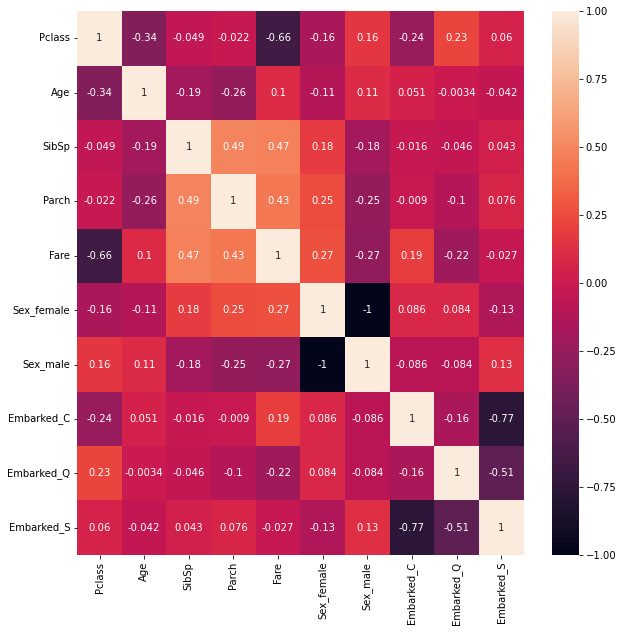

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(X_train_transformed.corr(method='spearman'), annot = True)

untuk tiap pasangan kolom lakukan uji spearman, apabila |korelasi linear| > 0.7, masukkan kolom 1 ke suatu list. Cegah pasangan diuji 2 kali. Print list kolom pertama yang korelasi linearnya tinggi ketika di uji.

In [ ]:
from scipy.stats import spearmanr

In [ ]:
a = []
b = []
for x in X_train_transformed.columns:
    for y in X_train_transformed.columns:
        if x != y:
            if [y,x] not in a:
                if np.abs(spearmanr(X_train_transformed[x], X_train_transformed[y])[0]) > 0.7:
                    if spearmanr(X_train_transformed[x], X_train_transformed[y])[1] < 0.05:
                        b.append(x)
                a.append([x,y])
                print([x,y], spearmanr(X_train_transformed[x], X_train_transformed[y])[0], spearmanr(X_train_transformed[x], X_train_transformed[y])[1])
            

['Pclass', 'Age'] -0.3406524392198868 8.359556821646304e-21
['Pclass', 'SibSp'] -0.049449343908860834 0.18751668459440987
['Pclass', 'Parch'] -0.021725222583835312 0.5627572024460129
['Pclass', 'Fare'] -0.6620869225919855 5.156022128400693e-91
['Pclass', 'Sex_female'] -0.160593124222616 1.6652965257311888e-05
['Pclass', 'Sex_male'] 0.160593124222616 1.6652965257311888e-05
['Pclass', 'Embarked_C'] -0.23674290738085915 1.5830742400537464e-10
['Pclass', 'Embarked_Q'] 0.22509052231562782 1.2497936212532232e-09
['Pclass', 'Embarked_S'] 0.06007425194056342 0.10924161430928009
['Age', 'SibSp'] -0.19298571946903267 2.1107277636675495e-07
['Age', 'Parch'] -0.25587303084763036 4.171197656064049e-12
['Age', 'Fare'] 0.10044685955329197 0.00731104440528988
['Age', 'Sex_female'] -0.10808031633468697 0.0038851753959549366
['Age', 'Sex_male'] 0.10808031633468697 0.0038851753959549366
['Age', 'Embarked_C'] 0.050607734885492146 0.1773772689225668
['Age', 'Embarked_Q'] -0.0033591864072945584 0.9287028039

In [ ]:
b

['Sex_female', 'Embarked_C']

In [ ]:
X_train_transformed_mc = X_train_transformed.drop(b, axis=1)

In [ ]:
X_train_transformed_mc.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-2.0,0.240602,0.0,0.0,3.145532,0.0,0.0,1.0
1,-2.0,0.481203,1.0,0.0,1.699907,1.0,0.0,1.0
2,-1.0,-0.300752,2.0,3.0,0.213165,0.0,0.0,1.0
3,0.0,0.120301,0.0,0.0,-0.261857,1.0,0.0,1.0
4,0.0,0.872180,0.0,0.0,-0.262939,1.0,1.0,0.0


# Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(X_train_transformed, y_train)

array([0.0602943 , 0.07552845, 0.01881399, 0.00633206, 0.11581275,
       0.13904596, 0.13716748, 0.00434236, 0.03360362, 0.        ])

In [ ]:
pd.DataFrame({'features': X_train_transformed.columns, 
             'mutual_info': mutual_info_classif(X_train_transformed, y_train)}).sort_values('mutual_info', ascending=False)

,features,mutual_info
6,Sex_male,0.166730
5,Sex_female,0.138547
4,Fare,0.118784
0,Pclass,0.065678
1,Age,0.051600
9,Embarked_S,0.035516
7,Embarked_C,0.025821
8,Embarked_Q,0.013274
2,SibSp,0.012391
3,Parch,0.000000


# Select K Best

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
kbest = SelectKBest(score_func = mutual_info_classif, k=7)
kbest.fit(X_train_transformed, y_train)

SelectKBest(k=7, score_func=<function mutual_info_classif at 0x7ff6a091c700>)

In [ ]:
kbest.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False,
       False])

In [ ]:
X_train_transformed.columns[kbest.get_support()]

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
X_train_obj_enc.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [ ]:
X_train_obj_enc

,Sex,Embarked
0,0.0,2.0
1,1.0,2.0
2,0.0,2.0
3,1.0,2.0
4,1.0,1.0
...,...,...
707,1.0,2.0
708,1.0,0.0
709,1.0,2.0
710,1.0,2.0


# Chi2

In [ ]:
chi2(X_train_obj_enc, y_train)[1]

array([3.50515526e-18, 8.84140364e-03])

In [ ]:
chi2_df = pd.DataFrame({'features': X_train_obj_enc.columns, 
                        'p_value': chi2(X_train_obj_enc, y_train)[1]})

In [ ]:
chi2_df

,features,p_value
0,Sex,3.505155e-18
1,Embarked,8.841404e-03


In [ ]:
X_train_mc = X_train_transformed_mc
X_train_mi = X_train_transformed[X_train_transformed.columns[kbest.get_support()]]

buat 3 trainset: 1: berdasarkan MC (threshold 0.7), 2: berdasarkan mutual information (top 10), 3: tanpa selection
buat model logistic regression pada ketiga trainset tersebut
print classification report

# Decision Tree

(1) split X, y
(2) split trainset, testset, testsize:0.2, stratify:y
(3) fit trainset ke decisiontreeclassifier
(4) plot_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree as tr

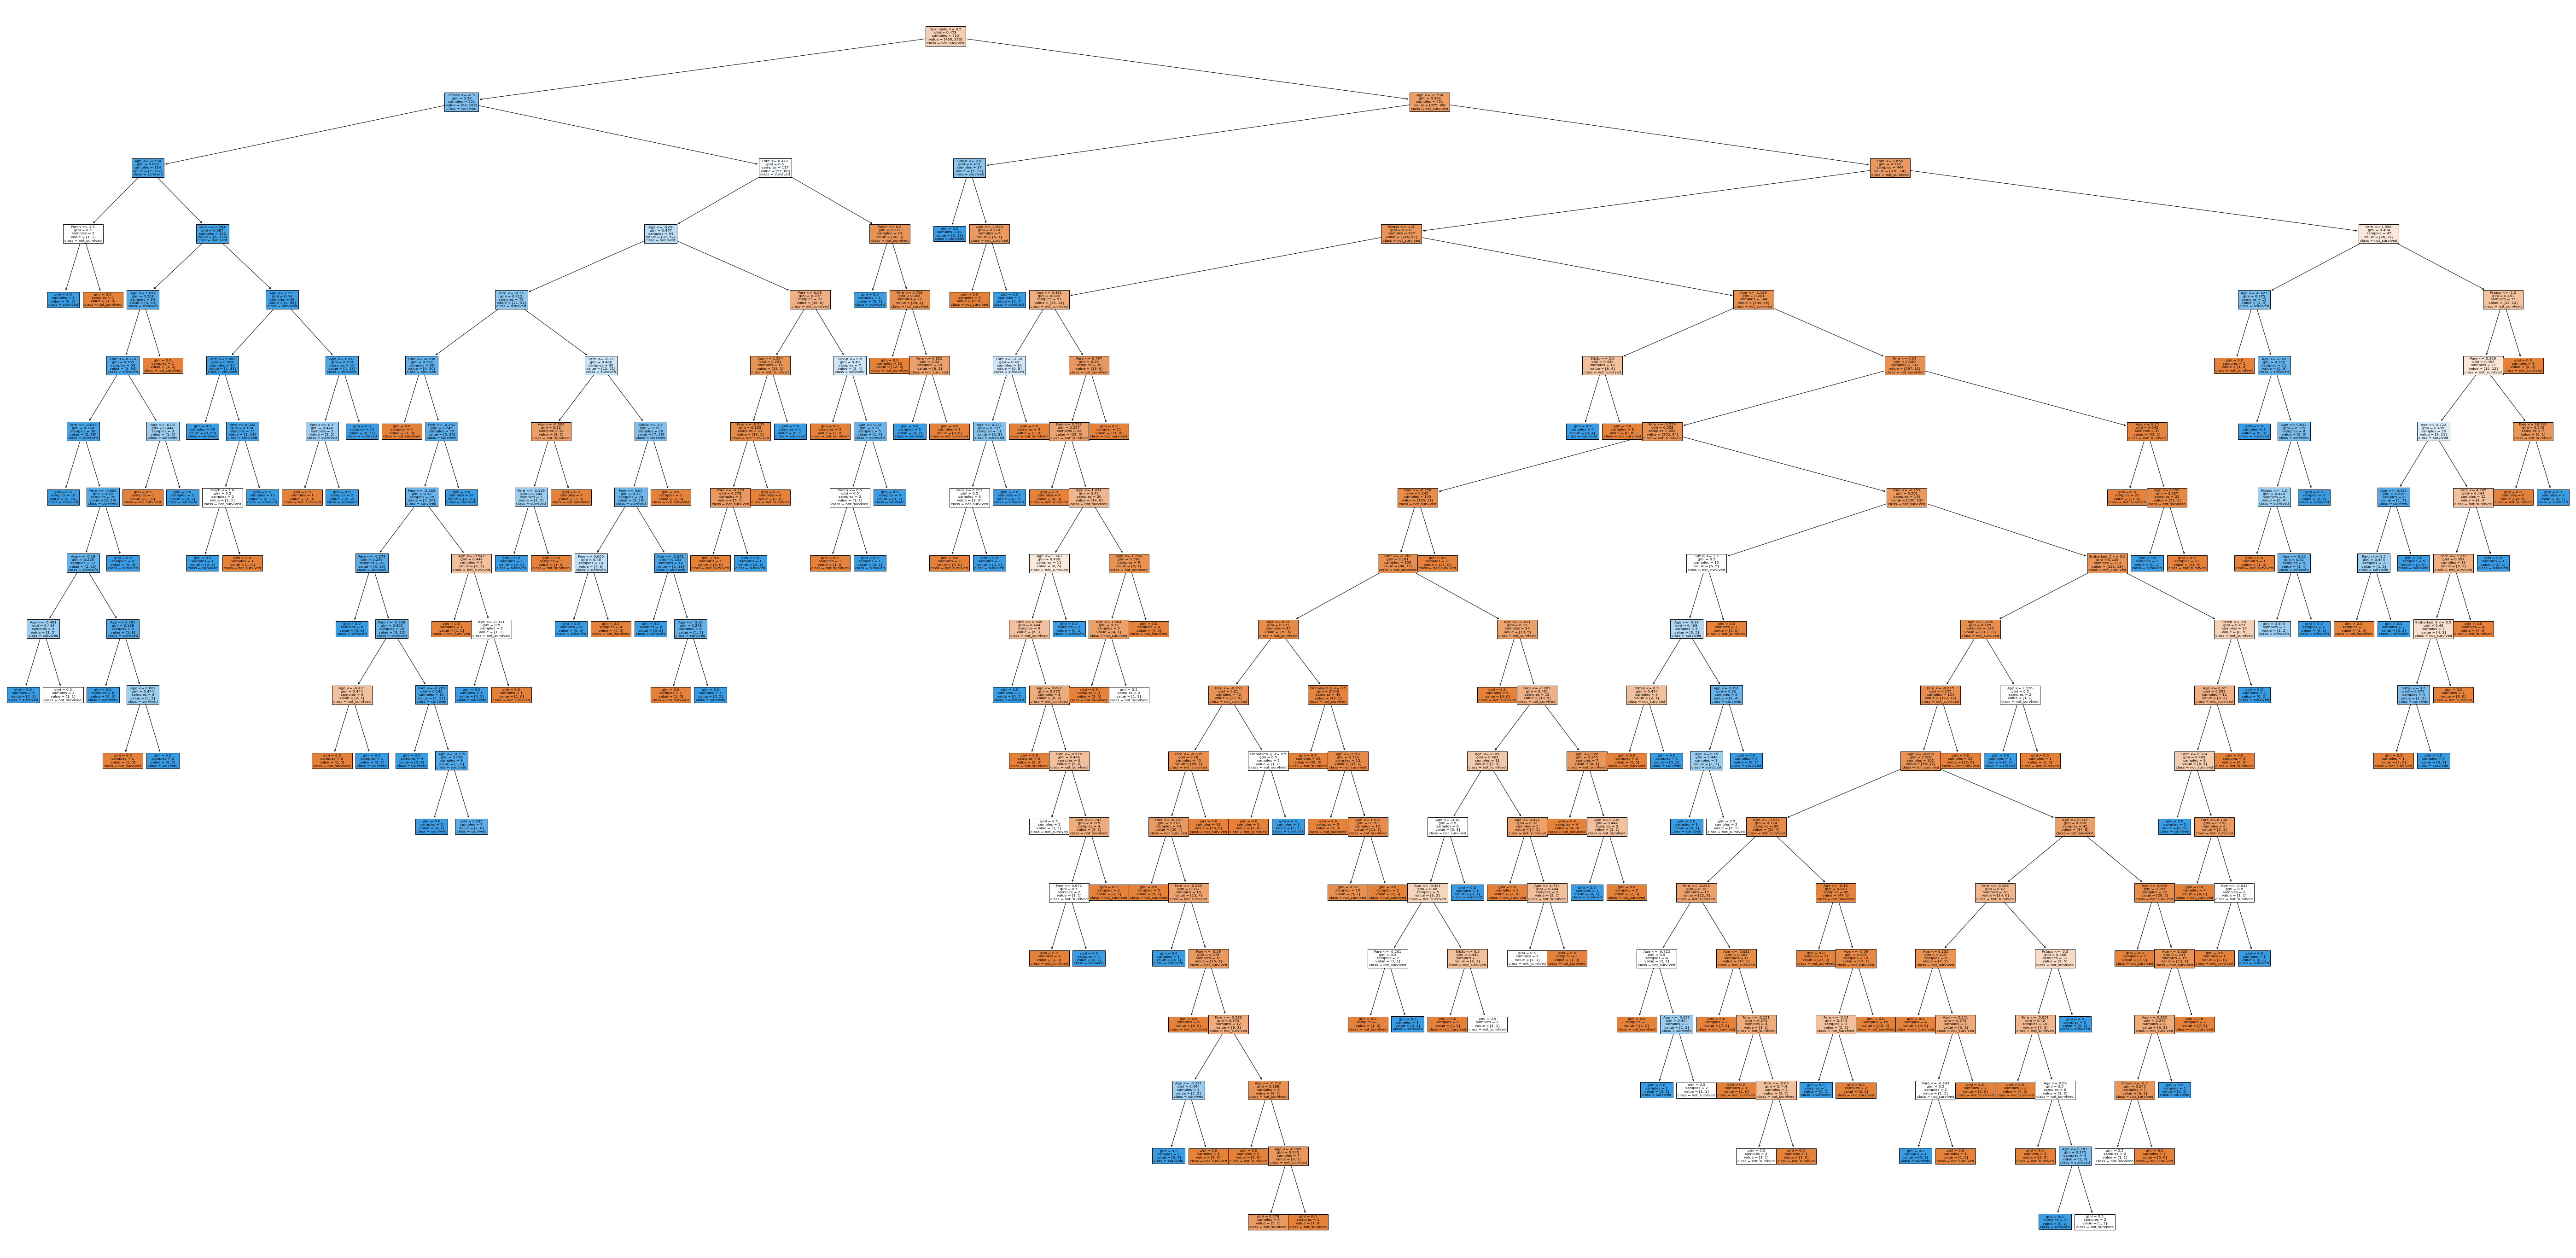

In [ ]:
plt.figure(figsize=(100,50))
tr.plot_tree(tree, filled=True, feature_names=X_train_transformed.columns, class_names=['not_survived', 'survived'])
plt.savefig('tree.jpg')
plt.show()

# Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import cross_validate
max_depths = np.arange(3,11,1)
train = []
valid = []
depths = []
for x in max_depths:
    result = cross_validate(DecisionTreeClassifier(max_depth=x), 
                   X_train_transformed,
                   y_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
    depths.append(x)

<AxesSubplot:>

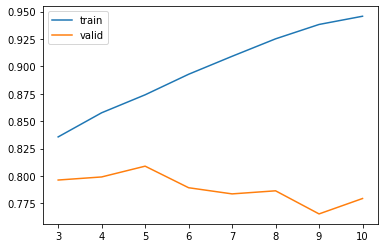

In [ ]:
import seaborn as sns
sns.lineplot(x=depths, y=train, label='train')
sns.lineplot(x=depths, y=valid, label='valid')

plot test_score dan train_score dari hasil cross validation dengan menggunakan berbagai nilai max_depths

<AxesSubplot:>

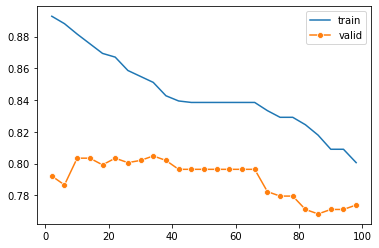

In [ ]:
from sklearn.model_selection import cross_validate
min_samples_split = np.arange(2,101,4)
train = []
valid = []
for x in min_samples_split:
    result = cross_validate(DecisionTreeClassifier(max_depth=6, min_samples_split=x), 
                   X_train_transformed, 
                   y_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=min_samples_split, y=train, label='train')
sns.lineplot(x=min_samples_split, y=valid, label='valid', marker='o')

<AxesSubplot:>

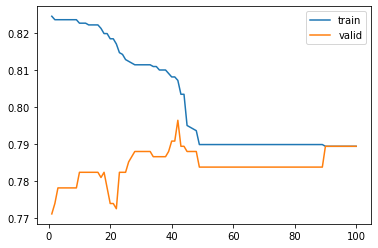

In [ ]:
from sklearn.model_selection import cross_validate
min_samples_leaf = np.arange(1,101,1)
train = []
valid = []
for x in min_samples_leaf:
    result = cross_validate(DecisionTreeClassifier(max_depth=6, 
                                                   min_samples_split=0.15, 
                                                   min_samples_leaf=x), 
                   X_train_transformed, 
                   y_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=min_samples_leaf, y=train, label='train')
sns.lineplot(x=min_samples_leaf, y=valid, label='valid')

<AxesSubplot:>

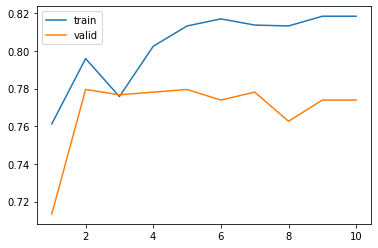

In [ ]:
from sklearn.model_selection import cross_validate
max_features = np.arange(1,len(X_train_transformed.columns)+1)
train = []
valid = []
for x in max_features:
    result = cross_validate(DecisionTreeClassifier(max_depth=6, 
                                                   min_samples_split=0.15, 
                                                   min_samples_leaf=20,
                                                  max_features=x), 
                   X_train_transformed, 
                   y_train, 
                   cv=4, 
                   return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x=max_features, y=train, label='train')
sns.lineplot(x=max_features, y=valid, label='valid')

Berdasarkan hasil tuning 4 hyperparameter, lakukan GridSearchCV (2 kemungkinan nilai untuk masing-masing hyperparameter), cv=4-fold. Print best params.

buat 2 learning algorithm decision tree. 1 decision tree menggunakan hyperparameter default. 1 lagi menggunakan optimized hyperparameter. Buat model dari masing-masing learning alg. Tampilkan classfication report untuk trainset dan testset.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[5,6,8],
             'min_samples_split':[14, 30],
             'min_samples_leaf':[20,30],
             'max_features':[5,8]}
gscv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=4)

In [ ]:
gscv.fit(X_train_transformed, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 6, 8], 'max_features': [5, 8],
                         'min_samples_leaf': [20, 30],
                         'min_samples_split': [14, 30]})

In [ ]:
gscv.best_params_

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 20,
 'min_samples_split': 30}

# Default vs Optimized

In [ ]:
tree_opt = DecisionTreeClassifier(max_depth=6,
                       min_samples_split=30,
                       min_samples_leaf=30,
                       max_features=5)

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train_transformed, y_train)
tree_opt.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=6, max_features=5, min_samples_leaf=30,
                       min_samples_split=30)

In [ ]:
y_pred_train_pred_d = tree.predict(X_train_transformed)
y_pred_test_pred_d = tree.predict(X_test_transformed)
y_pred_train_pred_o = tree_opt.predict(X_train_transformed)
y_pred_test_pred_o = tree_opt.predict(X_test_transformed)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print('train, default')
print(classification_report(y_train, y_pred_train_pred_d, labels=[1,0]))

train, default
              precision    recall  f1-score   support

           1       0.99      0.96      0.97       273
           0       0.97      1.00      0.98       439

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [ ]:
print('test, default')
print(classification_report(y_test, y_pred_test_pred_d, labels=[1,0]))

test, default
              precision    recall  f1-score   support

           1       0.59      0.80      0.67        69
           0       0.84      0.65      0.73       110

    accuracy                           0.70       179
   macro avg       0.71      0.72      0.70       179
weighted avg       0.74      0.70      0.71       179



In [ ]:
print('train, optimized')
print(classification_report(y_train, y_pred_train_pred_o, labels=[1,0]))

train, optimized
              precision    recall  f1-score   support

           1       0.91      0.58      0.71       273
           0       0.79      0.97      0.87       439

    accuracy                           0.82       712
   macro avg       0.85      0.77      0.79       712
weighted avg       0.84      0.82      0.81       712



In [ ]:
print('test, optimized')
print(classification_report(y_test, y_pred_test_pred_o, labels=[1,0]))

test, optimized
              precision    recall  f1-score   support

           1       0.87      0.58      0.70        69
           0       0.78      0.95      0.86       110

    accuracy                           0.80       179
   macro avg       0.83      0.76      0.78       179
weighted avg       0.82      0.80      0.79       179



# Feature Importance

In [ ]:
tree_opt.feature_importances_

array([0.15179555, 0.09228297, 0.        , 0.        , 0.07374118,
       0.65114056, 0.        , 0.        , 0.        , 0.03103974])

In [ ]:
pd.DataFrame({'features':X_train_transformed.columns, 'importance':tree_opt.feature_importances_.flatten()}).sort_values('importance', ascending=False)

,features,importance
5,Sex_female,0.651141
0,Pclass,0.151796
1,Age,0.092283
4,Fare,0.073741
9,Embarked_S,0.031040
2,SibSp,0.000000
3,Parch,0.000000
6,Sex_male,0.000000
7,Embarked_C,0.000000
8,Embarked_Q,0.000000


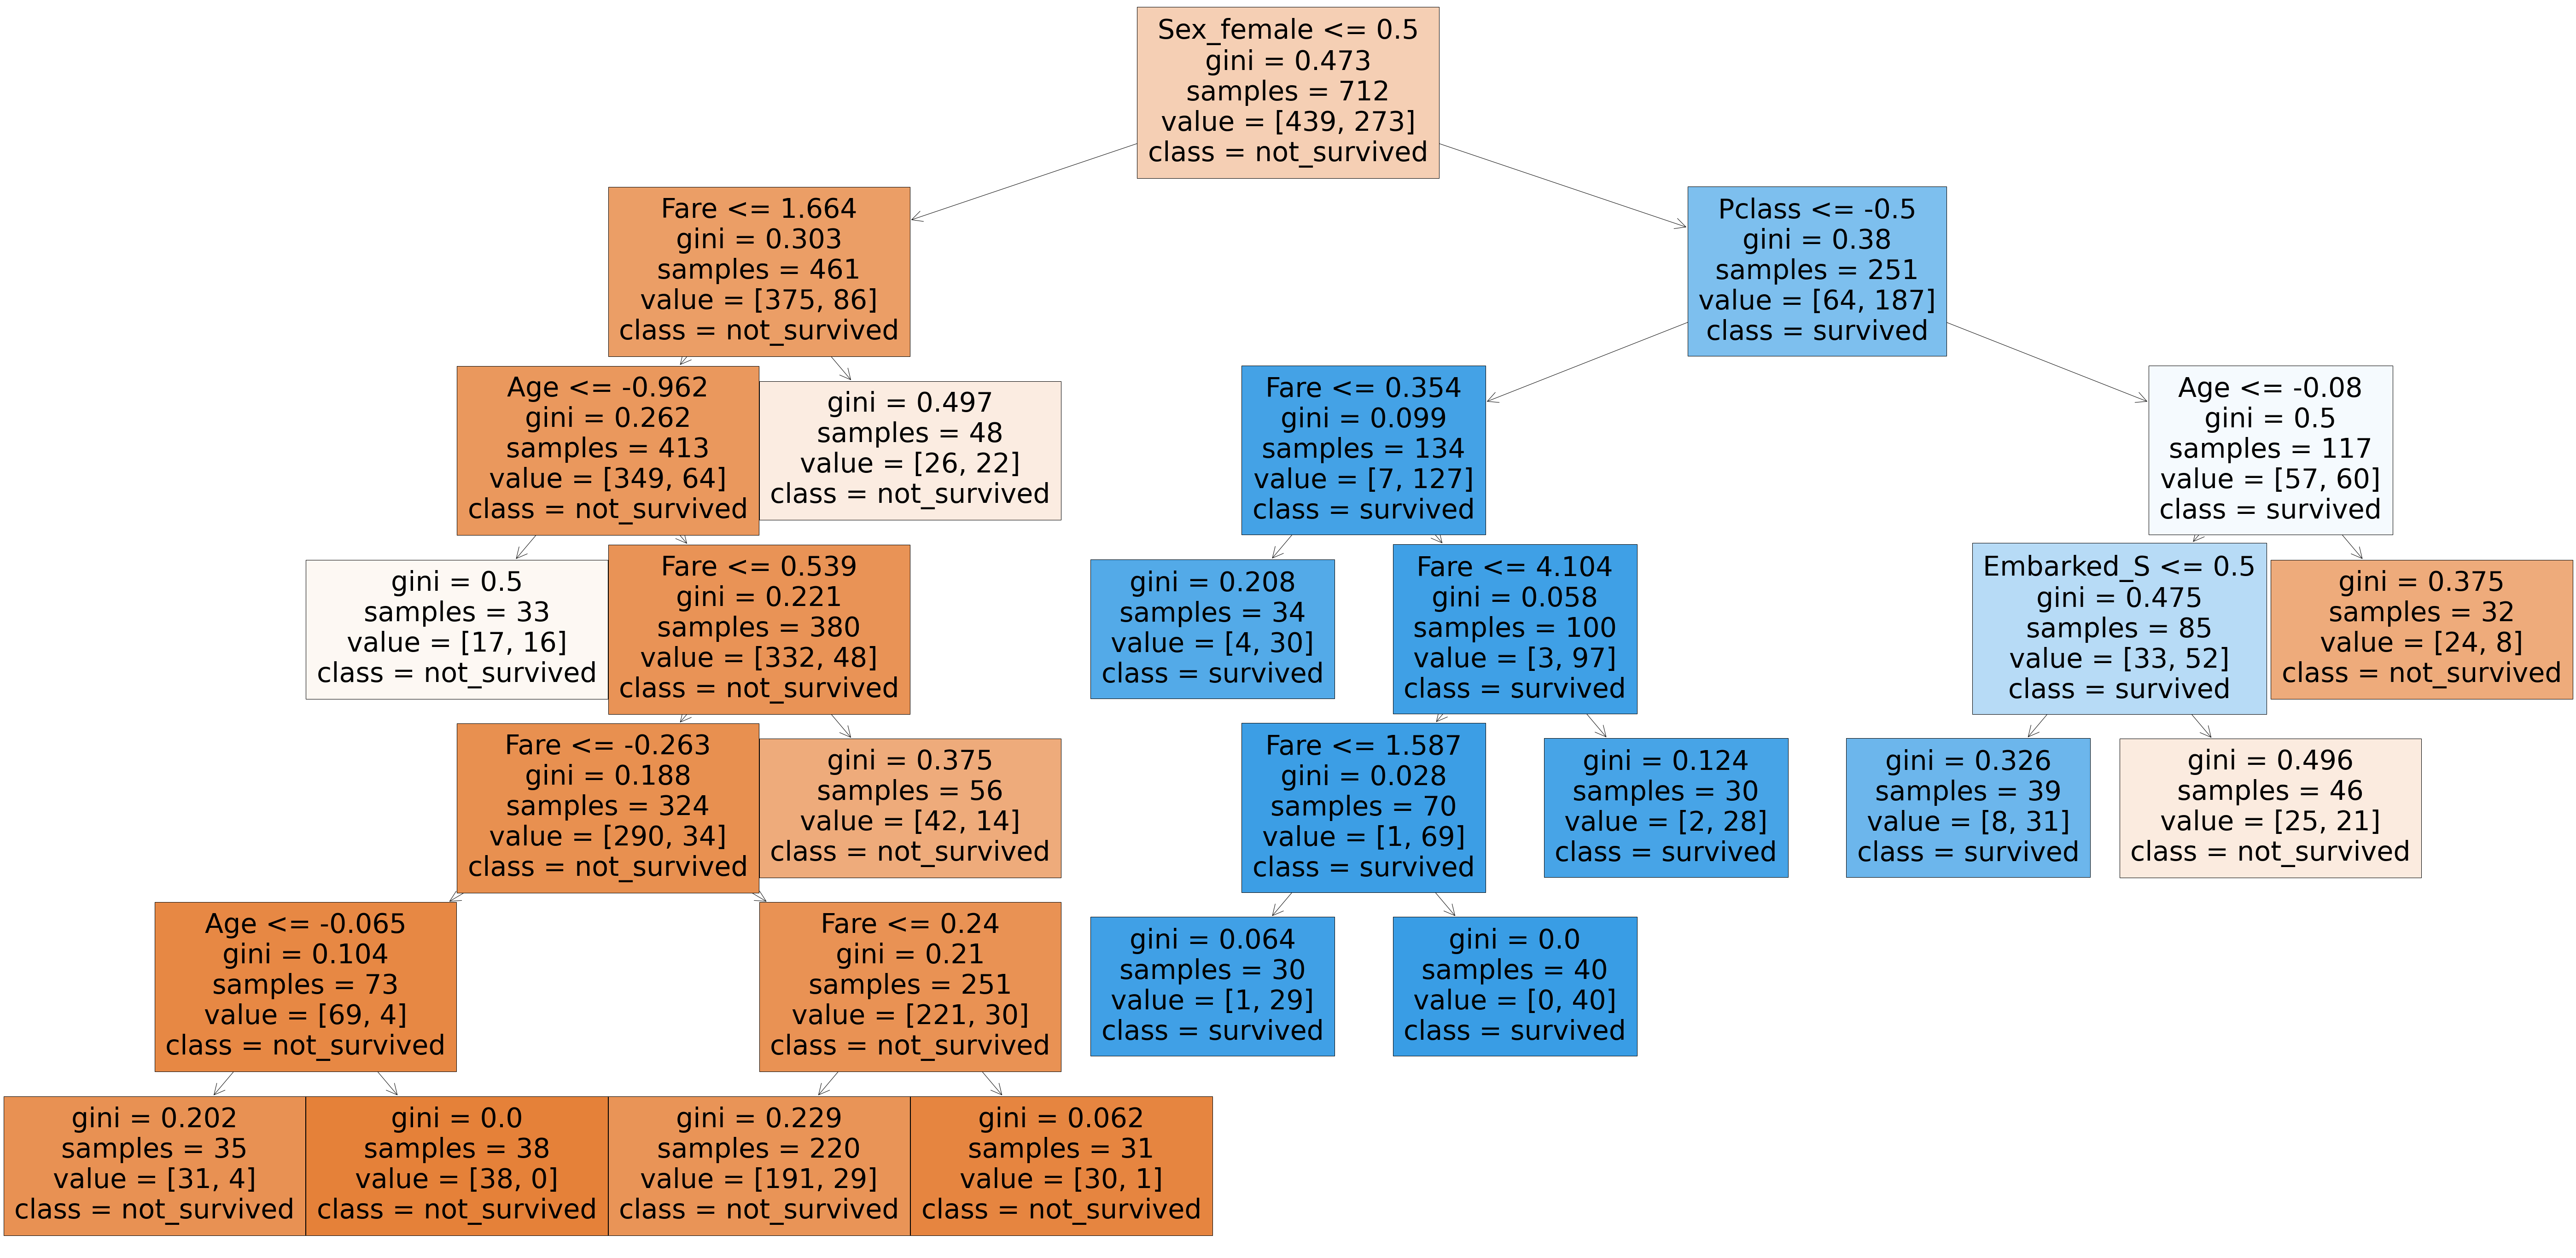

In [ ]:
plt.figure(figsize=(100,50))
tr.plot_tree(tree_opt, filled=True, feature_names=X_train_transformed.columns, class_names=['not_survived', 'survived'])
plt.savefig('tree_opt.jpg')
plt.show()